In [1]:
import pandas as pd; pd.set_option('display.max_rows', 500)

from __future__ import print_function
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib
import torchvision

import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

### Synchronizing actions and frames.
Actions come in at a lower frequency than frames, so we have to match them up as good as possible based on timestamp. This increases length of actions to match that of frames

In [2]:
group_folder_path = '../../videos/9.27_lazy_overhead/'
!ls '../../videos/9.27_lazy_overhead/'

DJI_0026_lr_frame_timestamps.csv
DJI_0026_lr.MP4
DJI_0027_lr_frame_timestamps.csv
DJI_0027_lr.MP4
DJI_0028_lr.MP4
DJI_0029_lr.MP4
DJI_0030_lr.MP4
DJI_0031_lr.MP4
DJI_0033_lr.MP4
DJI_0034_lr.MP4
DJI_0035_lr.MP4
DJI_0036_lr.MP4
DJI_0037_lr.MP4
DJI_0040_lr.MP4
DJI_0041_lr.MP4
DJI_0042_lr.MP4
DJI_0043_lr.MP4
DJIFlightRecord_2018-09-27_[16-20-07]-TxtLogToCsv.csv
DJIFlightRecord_2018-09-30_[08-28-21]-TxtLogToCsv.csv
DJIFlightRecord_2018-09-30_[08-35-09]-TxtLogToCsv.csv
DJIFlightRecord_2018-09-30_[09-58-56]-TxtLogToCsv.csv
DJIFlightRecord_2018-09-30_[10-12-16]-TxtLogToCsv.csv
DJIFlightRecord_2018-09-30_[10-24-27]-TxtLogToCsv.csv
DJIFlightRecord_2018-10-11_[14-58-09]-TxtLogToCsv.csv
DJIFlightRecord_2018-10-11_[15-11-24]-TxtLogToCsv.csv
DJIFlightRecord_2018-10-11_[19-01-09]-TxtLogToCsv.csv
DJIFlightRecord_2018-10-11_[19-13-25]-TxtLogToCsv.csv
DJIFlightRecord_2018-10-11_[19-26-04]-TxtLogToCsv.csv
DJIFlightRecord_2018-10-12_[16-44-29]-TxtLogToCsv.csv
DJIFlightRecord_2018-10-12_[16-57-54]-TxtLogTo

In [34]:
log_paths = ["DJIFlightRecord_2018-09-27_[16-20-07]-TxtLogToCsv.csv", 'DJIFlightRecord_2018-09-30_[08-28-21]-TxtLogToCsv.csv']
timestamps_paths = ['DJI_0026_lr_frame_timestamps.csv', 'DJI_0027_lr_frame_timestamps.csv']

import glob

log_paths = sorted(glob.glob(group_folder_path+"/*TxtLogToCsv.csv")); print(len(log_paths))
timestamps_paths = sorted(glob.glob(group_folder_path+"/*timestamps.csv")); print(len(timestamps_paths))
log_paths, timestamps_paths

15
15


(['../../videos/9.27_lazy_overhead/DJIFlightRecord_2018-09-27_[16-20-07]-TxtLogToCsv.csv',
  '../../videos/9.27_lazy_overhead/DJIFlightRecord_2018-09-30_[08-28-21]-TxtLogToCsv.csv',
  '../../videos/9.27_lazy_overhead/DJIFlightRecord_2018-09-30_[08-35-09]-TxtLogToCsv.csv',
  '../../videos/9.27_lazy_overhead/DJIFlightRecord_2018-09-30_[09-58-56]-TxtLogToCsv.csv',
  '../../videos/9.27_lazy_overhead/DJIFlightRecord_2018-09-30_[10-12-16]-TxtLogToCsv.csv',
  '../../videos/9.27_lazy_overhead/DJIFlightRecord_2018-09-30_[10-24-27]-TxtLogToCsv.csv',
  '../../videos/9.27_lazy_overhead/DJIFlightRecord_2018-10-11_[14-58-09]-TxtLogToCsv.csv',
  '../../videos/9.27_lazy_overhead/DJIFlightRecord_2018-10-11_[15-11-24]-TxtLogToCsv.csv',
  '../../videos/9.27_lazy_overhead/DJIFlightRecord_2018-10-11_[19-01-09]-TxtLogToCsv.csv',
  '../../videos/9.27_lazy_overhead/DJIFlightRecord_2018-10-11_[19-13-25]-TxtLogToCsv.csv',
  '../../videos/9.27_lazy_overhead/DJIFlightRecord_2018-10-11_[19-26-04]-TxtLogToCsv.csv',



../../video


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (96,142,144,184,185,186,190,193,194,195,196,198,200,201,202,210,211,212,213,214,215,216,219,271,272) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


     CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
804                          0.0         0.0          0.0          0.0   
805                          0.0         0.0          0.0          0.0   
806                          0.0         0.0          0.0          0.0   
807                          0.0         0.0          0.0          0.0   
808                          0.0         0.0          0.0          0.0   

     RC.rudder  
804        0.0  
805        0.0  
806        0.0  
807        0.0  
808        0.0  


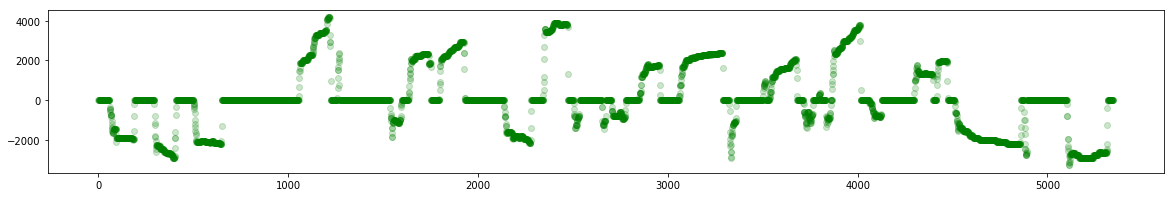

14216 
    timestamp
0      30063
1      30097
2      30130
3      30163
4      30197
      CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
5852                        504.0         0.0      10000.0       4530.0   
5853                        504.0         0.0      10000.0       4530.0   
5854                        504.0         0.0      10000.0       4545.0   
5855                        504.0         0.0      10000.0       4576.0   
5856                        504.0         0.0      10000.0       4591.0   

      RC.rudder  timestamp  
5852        0.0     504971  
5853        0.0     505071  
5854        0.0     505171  
5855        0.0     505271  
5856        0.0     505371  
   timestamp  CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  \
0      30063                          0.0         0.0          0.0   
1      30097                          0.0         0.0          0.0   
2      30130                          0.0         0.0          0.0   
3      30

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (96,142,144,190,193,194,195,196,198,200,201,202,210,211,212,213,214,215,216,219,271,272,273) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


      CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
1297                            0         0.0          0.0          0.0   
1298                            0         0.0          0.0          0.0   
1299                            0         0.0          0.0          0.0   
1300                            0         0.0          0.0          0.0   
1301                            0         0.0          0.0          0.0   

      RC.rudder  
1297        0.0  
1298        0.0  
1299        0.0  
1300        0.0  
1301        0.0  


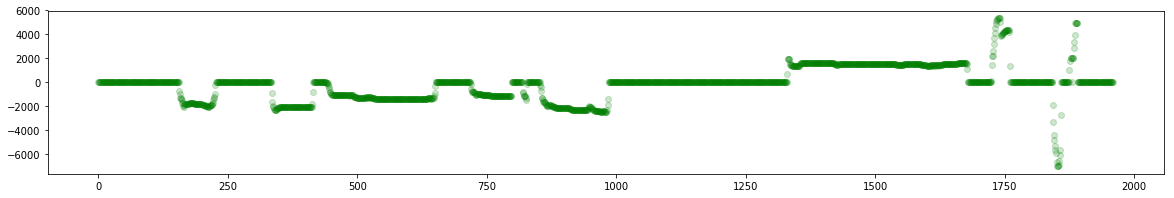

4342 
    timestamp
0      30063
1      30097
2      30130
3      30163
4      30197
      CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
2951                          174       121.0      10000.0          0.0   
2952                          174       106.0      10000.0          0.0   
2953                          174       106.0      10000.0          0.0   
2954                          174       106.0      10000.0          0.0   
2955                          174       106.0      10000.0          0.0   

      RC.rudder  timestamp  
2951     1545.0     175478  
2952     1545.0     175586  
2953     1545.0     175693  
2954     1561.0     175801  
2955     1561.0     175908  
   timestamp  CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  \
0      30063                          0.0         0.0          0.0   
1      30097                          0.0         0.0          0.0   
2      30130                          0.0         0.0          0.0   
3      301

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (96,142,144,190,193,194,195,196,198,200,201,202,210,211,212,213,214,215,216,219,271,272) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


     CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
296                            0         0.0          0.0          0.0   
297                            0         0.0          0.0          0.0   
298                            0         0.0          0.0          0.0   
299                            0         0.0        182.0          0.0   
300                            0         0.0       1667.0          0.0   

     RC.rudder  
296        0.0  
297        0.0  
298        0.0  
299        0.0  
300        0.0  


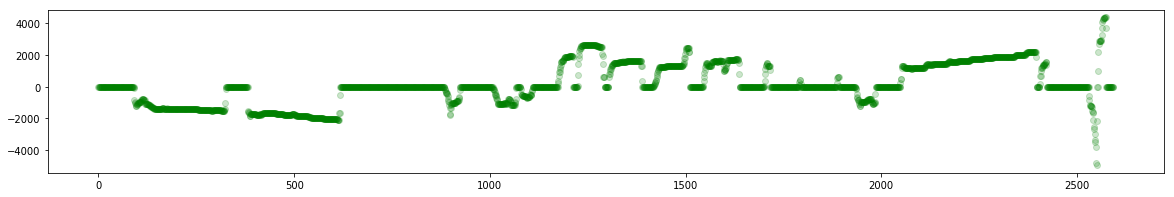

6001 
    timestamp
0      30063
1      30097
2      30130
3      30163
4      30197
      CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
2592                          230         0.0      10000.0          0.0   
2593                          230         0.0      10000.0          0.0   
2594                          230         0.0      10000.0          0.0   
2595                          230         0.0      10000.0          0.0   
2596                          230         0.0      10000.0          0.0   

      RC.rudder  timestamp  
2592     1864.0     230860  
2593     1864.0     230961  
2594     1864.0     231062  
2595     1864.0     231162  
2596     1864.0     231263  
   timestamp  CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  \
0      30063                          0.0         0.0          0.0   
1      30097                          0.0         0.0          0.0   
2      30130                          0.0         0.0          0.0   
3      301

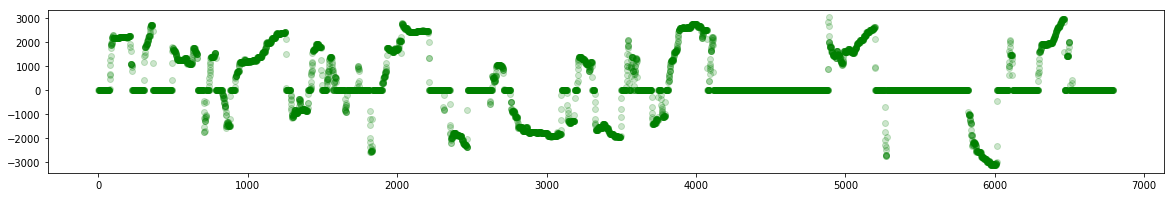

18584 
    timestamp
0      30063
1      30097
2      30130
3      30163
4      30197
      CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
6888                          650      1167.0      10000.0          0.0   
6889                          650      1152.0      10000.0          0.0   
6890                          650      1152.0      10000.0          0.0   
6891                          650      1167.0      10000.0          0.0   
6892                          650      1136.0      10000.0          0.0   

      RC.rudder  timestamp  
6888     1985.0     650716  
6889     1985.0     650816  
6890     1985.0     650916  
6891     1985.0     651016  
6892        0.0     651116  
   timestamp  CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  \
0      30063                          0.0         0.0          0.0   
1      30097                          0.0         0.0          0.0   
2      30130                          0.0         0.0          0.0   
3      30

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (96,142,144,190,193,194,195,196,198,200,201,202,210,211,212,213,214,215,216,219,272) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


     CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
281                            0         0.0          0.0          0.0   
282                            0         0.0          0.0          0.0   
283                            0         0.0          0.0          0.0   
284                            0         0.0          0.0          0.0   
285                            0         0.0        909.0          0.0   

     RC.rudder  
281        0.0  
282        0.0  
283        0.0  
284        0.0  
285        0.0  


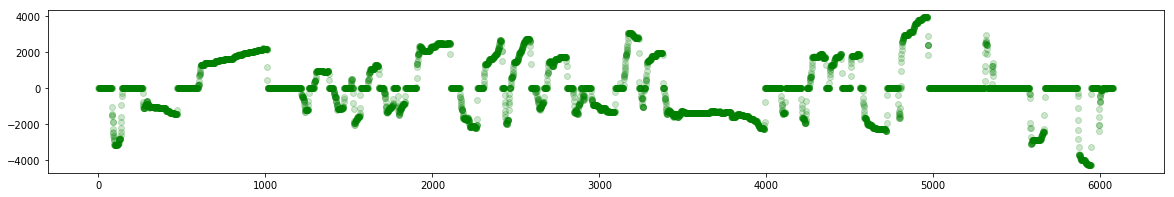

16436 
    timestamp
0      30063
1      30097
2      30130
3      30163
4      30197
      CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
6062                          578         0.0      10000.0     -10000.0   
6063                          578         0.0      10000.0     -10000.0   
6064                          578         0.0      10000.0     -10000.0   
6065                          578         0.0      10000.0     -10000.0   
6066                          578        15.0      10000.0      -9545.0   

      RC.rudder  timestamp  
6062        0.0     579044  
6063        0.0     579144  
6064        0.0     579245  
6065        0.0     579345  
6066        0.0     579445  
   timestamp  CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  \
0      30063                          0.0         0.0          0.0   
1      30097                          0.0         0.0          0.0   
2      30130                          0.0         0.0          0.0   
3      30

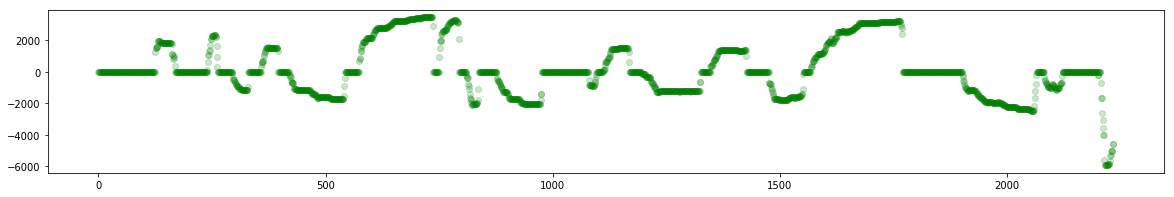

5862 
    timestamp
0      30063
1      30097
2      30130
3      30163
4      30197
      CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
2461                          223         0.0      10000.0          0.0   
2462                          223         0.0      10000.0          0.0   
2463                          223         0.0      10000.0          0.0   
2464                          223         0.0      10000.0          0.0   
2465                          224         0.0      10000.0          0.0   

      RC.rudder  timestamp  
2461    -5030.0     226218  
2462    -5030.0     226320  
2463    -5030.0     226422  
2464    -4606.0     226523  
2465    -4606.0     226625  
   timestamp  CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  \
0      30063                          0.0         0.0          0.0   
1      30097                          0.0         0.0          0.0   
2      30130                          0.0         0.0          0.0   
3      301

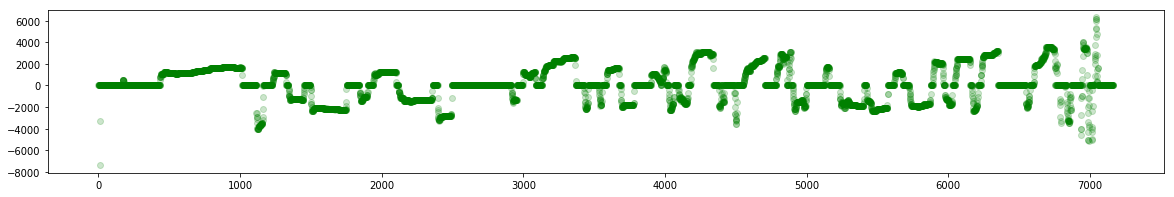

19813 
    timestamp
0      30063
1      30097
2      30130
3      30163
4      30197
      CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
6898                          691         0.0          0.0     -10000.0   
6899                          691         0.0          0.0     -10000.0   
6900                          691         0.0          0.0     -10000.0   
6901                          691         0.0          0.0     -10000.0   
6902                          691         0.0          0.0     -10000.0   

      RC.rudder  timestamp  
6898        0.0     691724  
6899        0.0     691824  
6900        0.0     691924  
6901        0.0     692024  
6902        0.0     692124  
   timestamp  CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  \
0      30063                          0.0         0.0          0.0   
1      30097                          0.0         0.0          0.0   
2      30130                          0.0         0.0          0.0   
3      30

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (96,142,144,190,193,194,195,196,198,200,201,202,210,211,212,213,214,215,216,219,273) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


   CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
0                            1         0.0          0.0          0.0   
1                            1         0.0          0.0          0.0   
2                            1         0.0          0.0          0.0   
3                            1         0.0          0.0          0.0   
4                            1         0.0          0.0          0.0   

   RC.rudder  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  


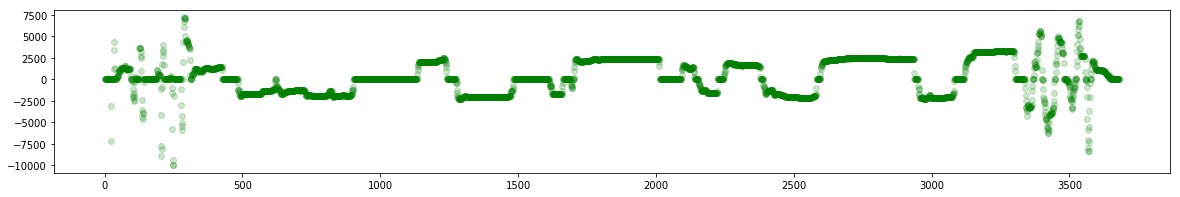

9375 
    timestamp
0      30063
1      30097
2      30130
3      30163
4      30197
      CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
3402                          342      1500.0      10000.0     -10000.0   
3403                          342      1515.0      10000.0     -10000.0   
3404                          342      1515.0      10000.0     -10000.0   
3405                          342      1500.0      10000.0     -10000.0   
3406                          342      1455.0      10000.0     -10000.0   

      RC.rudder  timestamp  
3402        0.0     343439  
3403     -136.0     343540  
3404     -136.0     343641  
3405    -1167.0     343741  
3406    -2015.0     343842  
   timestamp  CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  \
0      30063                          0.0         0.0          0.0   
1      30097                          0.0         0.0          0.0   
2      30130                          0.0         0.0          0.0   
3      301

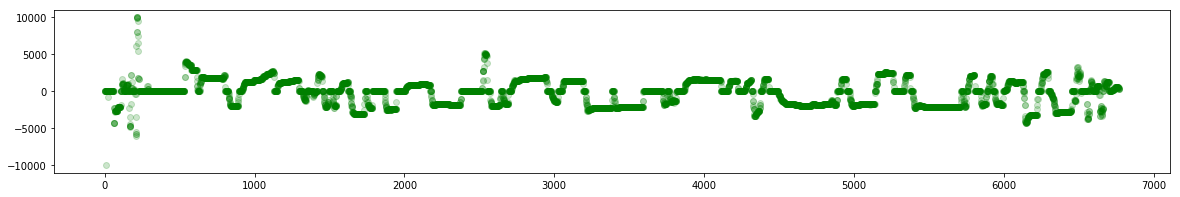

18645 
    timestamp
0      30063
1      30097
2      30130
3      30163
4      30197
      CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
6499                          652         0.0      10000.0     -10000.0   
6500                          652         0.0      10000.0     -10000.0   
6501                          652       212.0      10000.0     -10000.0   
6502                          652        61.0      10000.0     -10000.0   
6503                          652         0.0      10000.0     -10000.0   

      RC.rudder  timestamp  
6499     2348.0     652751  
6500     2348.0     652851  
6501     1591.0     652951  
6502     1348.0     653052  
6503     1924.0     653152  
   timestamp  CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  \
0      30063                          0.0         0.0          0.0   
1      30097                          0.0         0.0          0.0   
2      30130                          0.0         0.0          0.0   
3      30

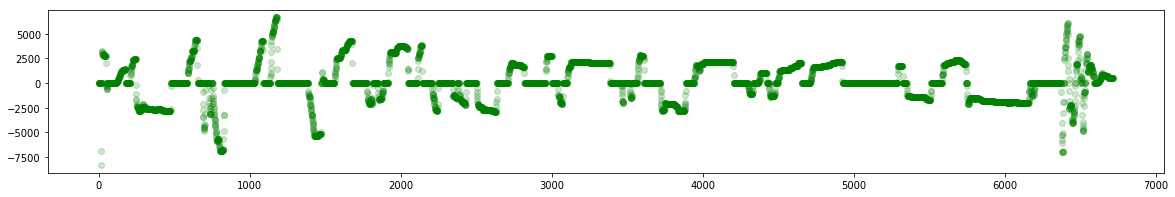

18733 
    timestamp
0      30063
1      30097
2      30130
3      30163
4      30197
      CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
6489                          655         0.0      10000.0     -10000.0   
6490                          655         0.0      10000.0     -10000.0   
6491                          655         0.0      10000.0     -10000.0   
6492                          655         0.0      10000.0     -10000.0   
6493                          655         0.0      10000.0     -10000.0   

      RC.rudder  timestamp  
6489     3879.0     655688  
6490     3803.0     655788  
6491     4000.0     655888  
6492     4364.0     655988  
6493     4621.0     656088  
   timestamp  CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  \
0      30063                          0.0         0.0          0.0   
1      30097                          0.0         0.0          0.0   
2      30130                          0.0         0.0          0.0   
3      30

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (96,271,272,273) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


    CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
30                            0         0.0          0.0          0.0   
31                            0         0.0          0.0          0.0   
32                            0         0.0          0.0          0.0   
33                            0         0.0          0.0          0.0   
34                            0         0.0          0.0          0.0   

    RC.rudder  
30        0.0  
31        0.0  
32        0.0  
33        0.0  
34        0.0  


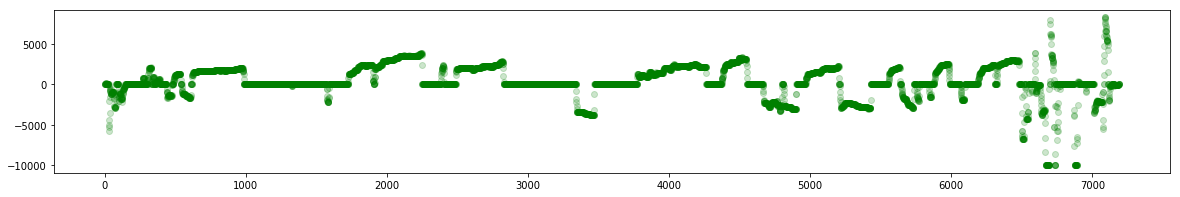

19942 
    timestamp
0      30063
1      30097
2      30130
3      30163
4      30197
      CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
6955                          695         0.0          0.0     -10000.0   
6956                          695         0.0          0.0     -10000.0   
6957                          695         0.0          0.0     -10000.0   
6958                          695         0.0          0.0     -10000.0   
6959                          695         0.0          0.0     -10000.0   

      RC.rudder  timestamp  
6955        0.0     696026  
6956        0.0     696126  
6957        0.0     696227  
6958        0.0     696327  
6959        0.0     696428  
   timestamp  CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  \
0      30063                          0.0         0.0          0.0   
1      30097                          0.0         0.0          0.0   
2      30130                          0.0         0.0          0.0   
3      30

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (96,142,144,190,193,194,195,196,198,200,201,202,210,211,212,213,214,215,216,219,271,273) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


   CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
0                            2         0.0          0.0          0.0   
1                            2         0.0          0.0          0.0   
2                            2         0.0          0.0          0.0   
3                            2         0.0          0.0          0.0   
4                            2         0.0          0.0          0.0   

   RC.rudder  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  


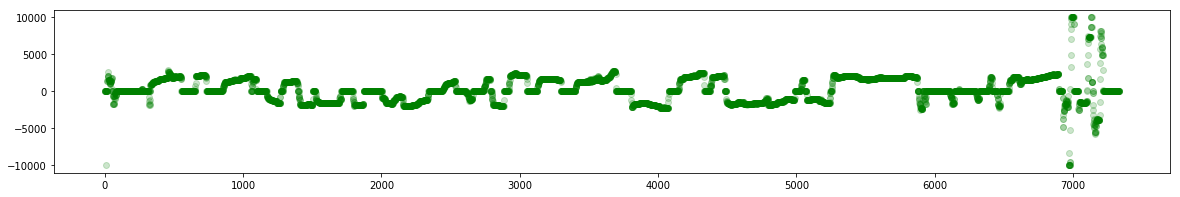

20345 
    timestamp
0      30063
1      30097
2      30130
3      30163
4      30197
      CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
7052                          708       636.0      10000.0     -10000.0   
7053                          708       636.0      10000.0     -10000.0   
7054                          708       591.0      10000.0     -10000.0   
7055                          708       591.0      10000.0     -10000.0   
7056                          708       470.0      10000.0     -10000.0   

      RC.rudder  timestamp  
7052    -1439.0     709474  
7053    -1439.0     709574  
7054    -1455.0     709674  
7055    -1455.0     709775  
7056    -1470.0     709875  
   timestamp  CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  \
0      30063                          0.0         0.0          0.0   
1      30097                          0.0         0.0          0.0   
2      30130                          0.0         0.0          0.0   
3      30

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (96,142,144,184,185,186,190,193,194,195,196,198,200,201,202,210,211,212,213,214,215,216,219) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


   CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
1                          2.0         0.0          0.0          0.0   
2                          2.0         0.0          0.0          0.0   
3                          2.0         0.0          0.0          0.0   
4                          2.0         0.0          0.0          0.0   
5                          2.0         0.0          0.0          0.0   

   RC.rudder  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
5        0.0  


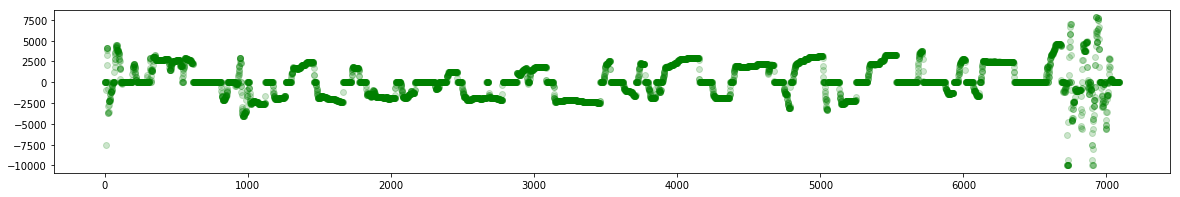

19609 
    timestamp
0      30063
1      30097
2      30130
3      30163
4      30197
      CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
6831                        684.0         0.0          0.0     -10000.0   
6832                        684.0         0.0          0.0     -10000.0   
6833                        684.0         0.0          0.0     -10000.0   
6834                        684.0         0.0          0.0     -10000.0   
6835                        684.0         0.0          0.0     -10000.0   

      RC.rudder  timestamp  
6831        0.0     684917  
6832     1561.0     685017  
6833     2652.0     685117  
6834     2652.0     685217  
6835     4136.0     685317  
   timestamp  CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  \
0      30063                          0.0         0.0          0.0   
1      30097                          0.0         0.0          0.0   
2      30130                          0.0         0.0          0.0   
3      30

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (96,142,144,190,193,194,195,196,198,200,201,202,210,211,212,213,214,215,216,219) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


   CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
0                            3         0.0          0.0          0.0   
1                            3         0.0          0.0          0.0   
2                            3         0.0          0.0          0.0   
3                            3         0.0          0.0          0.0   
4                            3         0.0          0.0          0.0   

   RC.rudder  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  


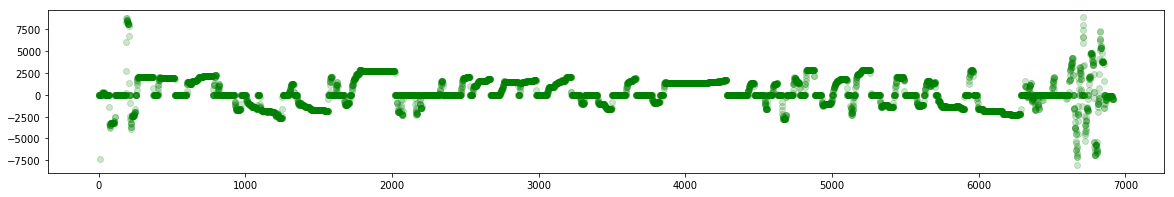

19161 
    timestamp
0      30063
1      30097
2      30130
3      30163
4      30197
      CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
6645                          669         0.0      10000.0     -10000.0   
6646                          669         0.0      10000.0     -10000.0   
6647                          669         0.0      10000.0     -10000.0   
6648                          669         0.0      10000.0     -10000.0   
6649                          669         0.0      10000.0     -10000.0   

      RC.rudder  timestamp  
6645        0.0     669967  
6646        0.0     670068  
6647        0.0     670168  
6648        0.0     670269  
6649    -1485.0     670369  
   timestamp  CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  \
0      30063                          0.0         0.0          0.0   
1      30097                          0.0         0.0          0.0   
2      30130                          0.0         0.0          0.0   
3      30

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (96,142,144,190,193,194,195,196,198,200,201,202,210,211,212,213,214,215,216,219,271) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


   CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
0                            3         0.0          0.0          0.0   
1                            3         0.0          0.0          0.0   
2                            3         0.0          0.0          0.0   
3                            3         0.0          0.0          0.0   
4                            3         0.0          0.0          0.0   

   RC.rudder  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  


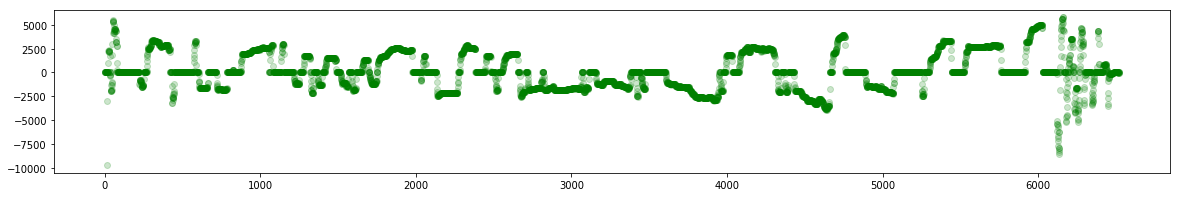

17980 
    timestamp
0      30063
1      30097
2      30130
3      30163
4      30197
      CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  RC.throttle  \
6237                          629      1167.0      10000.0     -10000.0   
6238                          629      1167.0      10000.0     -10000.0   
6239                          629      1167.0      10000.0     -10000.0   
6240                          629      1182.0      10000.0     -10000.0   
6241                          629      1197.0      10000.0     -10000.0   

      RC.rudder  timestamp  
6237    -3333.0     630560  
6238    -2652.0     630661  
6239    -2061.0     630762  
6240    -1773.0     630862  
6241    -1682.0     630963  
   timestamp  CAMERA_INFO.videoRecordTime  RC.aileron  RC.elevator  \
0      30063                          0.0         0.0          0.0   
1      30097                          0.0         0.0          0.0   
2      30130                          0.0         0.0          0.0   
3      30

In [35]:
# iterate through each video, merging frame timestamps df (longer) w actions df (shorter) based on the timestamp 
# from each df. 

all_dfs = []

n_vids = len(log_paths) # log paths and timestamps paths num of should be equal

for i in range(n_vids):
    vid_id = timestamps_paths[i][:11]
    print('\n\n'+vid_id)
    
    log_path = group_folder_path + log_paths[i]

    actions_df = pd.read_csv(log_path).fillna(0); len(actions_df)
    
    cols = ["CAMERA_INFO.videoRecordTime", "RC.aileron", "RC.elevator", "RC.throttle", "RC.rudder"]

    actions_df = actions_df[actions_df["CAMERA_INFO.recordState"]=="Starting"][cols]; len(actions_df)
    #actions_df["action_ix"]=range(len(actions_df)); len(actions_df)
    
    print(actions_df.head())
    
    seq = actions_df["RC.rudder"]
    plt.figure(figsize=(20,3))
    plt.plot(np.arange(len(seq)), seq, 'go', alpha=0.2, markerfacecolor='green')
    plt.show()
    
    # Reading in FRAME timestamps
    timestamps_path = timestamps_paths[i]
    timestamps = pd.read_csv(group_folder_path+timestamps_path); print(len(timestamps),'\n', timestamps.head())
    
    # Estimating ACTION timestamps
    min_timestamp = int(timestamps.iloc[0]); max_timestamp = int(timestamps.iloc[-1])

    actions_df = actions_df[(actions_df['CAMERA_INFO.videoRecordTime'] > (min_timestamp/1000)) & 
                           (actions_df['CAMERA_INFO.videoRecordTime'] < (max_timestamp/1000))]
    
    actions_df["timestamp"] = np.round(np.linspace(min_timestamp, max_timestamp, len(actions_df)), 0).astype(int)
    
    actions_df["timestamp"] += 1000; # Adding a second here seems to line up actions better
    
    print(actions_df.tail())
    
    # Merging ACTION and FRAME on closest timestamp
    a = pd.merge_asof(left=timestamps, right=actions_df, on="timestamp").fillna(0); 
    a["vid_id"] = vid_id; print(a.head())
    
    all_dfs += [a]

In [36]:
df = pd.concat(all_dfs, axis=0); df.head()

,timestamp,CAMERA_INFO.videoRecordTime,RC.aileron,RC.elevator,RC.throttle,RC.rudder,vid_id
0,30063,0.0,0.0,0.0,0.0,0.0,../../video
1,30097,0.0,0.0,0.0,0.0,0.0,../../video
2,30130,0.0,0.0,0.0,0.0,0.0,../../video
3,30163,0.0,0.0,0.0,0.0,0.0,../../video
4,30197,0.0,0.0,0.0,0.0,0.0,../../video


In [28]:
# Saving entire sequence of actions, to be loaded together w z seqs. 

actions = torch.tensor(list(df["RC.rudder"])).unsqueeze(1)
torch.save(actions, "actions_sequential.pt"); len(actions)

18558

In [5]:
# Loading z seqs from VAE. Same shape, essence as sine waves above.

#"z_seq_sequential_9.7.pt"
z_seq_file = "z_seq_sequential_9.8.pt"

z_seq = torch.load(z_seq_file); print(z_seq.shape)

df_vid = pd.DataFrame({"frame":range(len(z_seq))}); df_vid.head()

(10194, 100)


,frame
0,0
1,1
2,2
3,3
4,4


In [6]:
al = len(actions_df); print(al)
vl = len(df_vid); print(vl)

3910
10194


In [7]:
ls = np.linspace(0, (al), vl); print(len(ls))
j = np.round(ls, 0).astype(int); print(len(j))
df_vid["action_ix"] = j

10194
10194


In [8]:
a = pd.merge(df_vid, actions_df, how="left", on="action_ix").fillna(0); len(a)

10194

In [9]:
actions = torch.tensor(a["RC.throttle"]).unsqueeze(1)

In [44]:
# If catting to zs
# torch.cat([actions, torch.tensor(z_seq)], dim=1).shape

torch.Size([2532, 101])

In [10]:
# Saving entire sequence of actions, to be loaded together w z seqs
torch.save(actions, "actions_sequential_9.10.pt")

In [11]:
actions.shape # same size as z seqs, can be easily concatenated on. 

torch.Size([10194, 1])

In [16]:
actions_df.tail()

,CAMERA_INFO.videoRecordTime,RC.aileron,RC.elevator,RC.throttle,RC.rudder,action_ix
3995,390,0.0,0.0,0.0,0.0,3905
3996,390,0.0,0.0,0.0,0.0,3906
3997,390,0.0,0.0,0.0,0.0,3907
3998,390,0.0,0.0,0.0,0.0,3908
3999,390,0.0,0.0,0.0,0.0,3909
